In [ ]:
pip install pandas matplotlib seaborn scikit-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
# Load Data
df = pd.read_csv('SampleSuperstore.csv')

In [9]:
df.head(1)

,Order Date,Customer ID,Segment,Region,Product ID,Category,Sub-Category,Sales,Quantity,Profit
0,11-08-2016,CG-12520,Consumer,South,FUR-BO-10001798,Furniture,Bookcases,261.96,2,41.9136


In [12]:
#Clean Data
# df.drop(['Product ID'], axis=1, inplace=True)
df['Order Date'] = pd.to_datetime(df['Order Date'], infer_datetime_format=True, errors='coerce')
df['Month'] = df['Order Date'].dt.to_period('M')
df['Profit Margin'] = df['Profit'] / df['Sales']

C:\Users\rajan\AppData\Local\Temp\ipykernel_16668\1856339967.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Order Date'] = pd.to_datetime(df['Order Date'], infer_datetime_format=True, errors='coerce')


In [13]:
# Save cleaned file
df.to_csv('CleanedSuperstore.csv', index=False)
print("Data cleaned and saved successfully.")

Data cleaned and saved successfully.


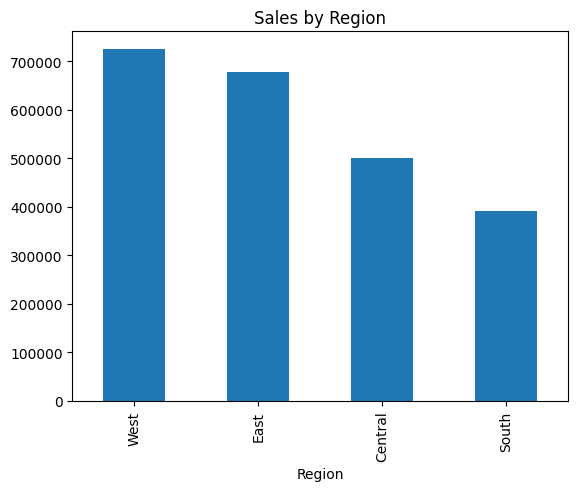

In [14]:
# Top Regions by Sales
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', title='Sales by Region')
plt.show()

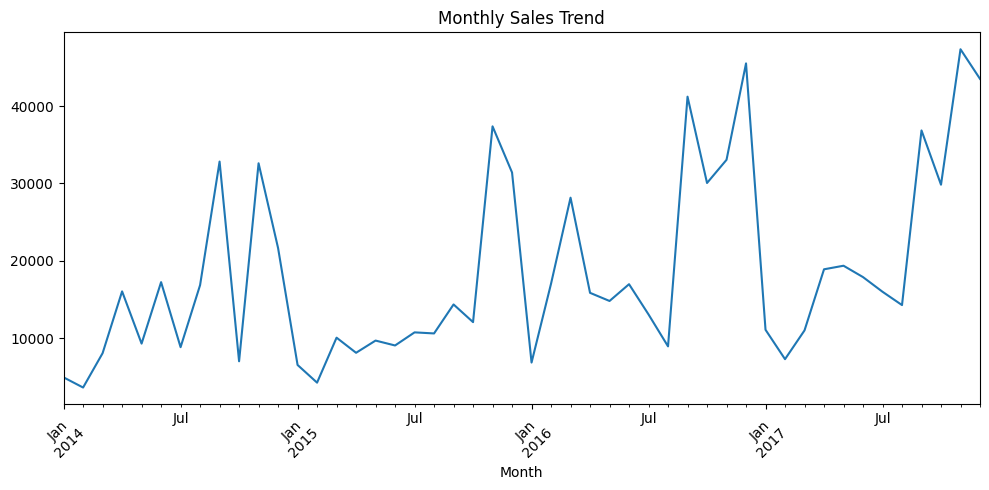

In [15]:
# Sales Over Time
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales.plot(title='Monthly Sales Trend', figsize=(10, 5))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

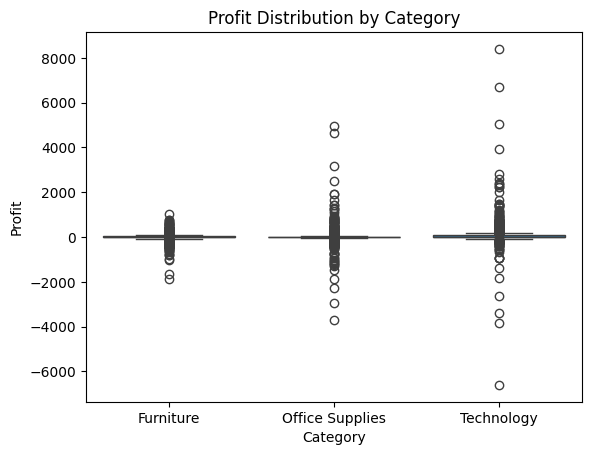

In [16]:
# Category Distribution
sns.boxplot(x='Category', y='Profit', data=df)
plt.title('Profit Distribution by Category')
plt.show()

In [17]:
# Forecast future sales using Linear Regression
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()
monthly_sales['Order Date'] = monthly_sales['Order Date'].dt.to_timestamp()


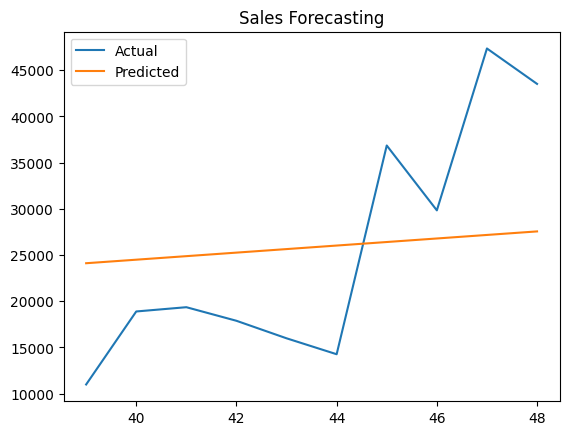

In [19]:
# Convert to numerical values
monthly_sales['Month_Num'] = range(1, len(monthly_sales)+1)

X = monthly_sales[['Month_Num']]
y = monthly_sales['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.plot(X_test['Month_Num'], y_test, label='Actual')
plt.plot(X_test['Month_Num'], y_pred, label='Predicted')
plt.legend()
plt.title("Sales Forecasting")
plt.show()